   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

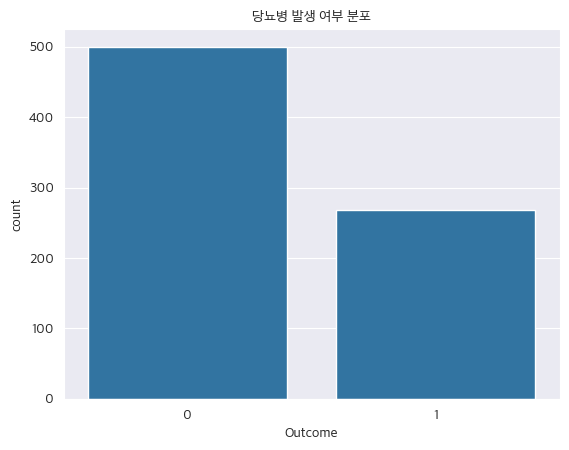

In [4]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.font_manager as fm
import graphviz

# SSL 인증서 무시
ssl._create_default_https_context = ssl._create_unverified_context

# 📌 데이터 다운로드 및 로드
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# 데이터셋 컬럼 이름 정의
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, names=columns)

# 데이터 확인
print(df.head())
print(df.info())

# 폰트 경로 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 클래스 분포 확인
sns.countplot(x=df["Outcome"])
plt.title("당뇨병 발생 여부 분포", fontproperties=font_prop)
plt.show()

In [5]:
# 🎯 독립 변수(X)와 종속 변수(y) 정의
X = df.drop(columns=["Outcome"])  # 8개의 건강 지표
y = df["Outcome"]  # 0(당뇨 아님), 1(당뇨병)

# 📌 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📊 데이터 정규화 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


모델 정확도: 0.79


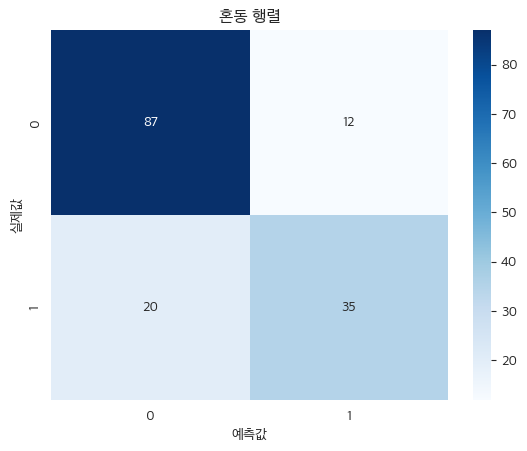

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [6]:
# 🌳 결정 트리 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 🎯 예측 수행
y_pred = model.predict(X_test_scaled)

# 📌 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.2f}")

# 🔥 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("혼동 행렬")
plt.show()

# 📊 분류 보고서 출력
print(classification_report(y_test, y_pred))


In [7]:
# 샘플 데이터 3개 생성 (기존 데이터의 평균 및 범위를 참고)
sample_data = pd.DataFrame(
    [
        [2, 120, 70, 30, 80, 25.0, 0.5, 35],  # 예제 1: 정상 범위
        [5, 180, 88, 35, 120, 30.0, 0.7, 50], # 예제 2: 당뇨 위험
        [0, 95, 60, 25, 60, 22.0, 0.3, 21]   # 예제 3: 건강한 젊은 사람
    ],
    columns=X.columns  # 원래 학습 데이터와 동일한 열 이름 사용
)

# 📌 스케일링 적용 (훈련 데이터와 같은 방식으로 변환)
sample_data_scaled = scaler.transform(sample_data)

# 🎯 예측 수행
sample_predictions = model.predict(sample_data_scaled)
sample_probabilities = model.predict_proba(sample_data_scaled)[:, 1]  # 당뇨병(1)일 확률

# 🔍 결과 출력
for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    print(f"샘플 {i+1}: 예측 결과 = {'당뇨병 있음(1)' if pred == 1 else '당뇨병 없음(0)'} (확률: {prob:.2f})")


샘플 1: 예측 결과 = 당뇨병 없음(0) (확률: 0.00)
샘플 2: 예측 결과 = 당뇨병 있음(1) (확률: 1.00)
샘플 3: 예측 결과 = 당뇨병 없음(0) (확률: 0.00)


In [8]:
# 📌 결정 트리 모델을 Graphviz 형식으로 변환
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    model,                      # 🎯 결정 트리 모델
    out_file=None,              # 파일 저장 안 함 (None이면 문자열로 반환)
    feature_names=X.columns,    # 📌 특성(Feature) 이름 지정
    class_names=["No Diabetes", "Diabetes"],  # 📌 클래스 이름 지정
    filled=True,                # 📌 색상 채우기 (Gini 계수 기반)
    rounded=True,               # 📌 둥근 모서리 적용
    special_characters=True      # 📌 특수문자 지원 (텍스트 오류 방지)
)


# Graphviz 객체 생성 및 출력
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # PDF 파일로 저장 가능
graph.view()  # 생성된 그래프 열기

'decision_tree.pdf'